In [5]:
conda install git      # Run if unzip command doesn't work

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install kaggle
!kaggle datasets download -d gauravtopre/bank-customer-churn-dataset
!unzip -q bank-customer-churn-dataset.zip -d bank-customer-churn-dataset


  0%|          | 0.00/187k [00:00<?, ?B/s]
100%|##########| 187k/187k [00:00<00:00, 3.41MB/s]


# Import Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bank-customer-churn-dataset/Bank Customer Churn Prediction.csv")

In [8]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [11]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:>

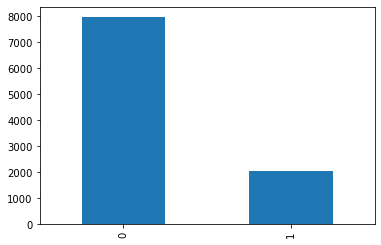

In [12]:
df.churn.value_counts().plot(kind="bar")

In [3]:
# Change string values to numeric

Country = {"Germany":0, "France":1, "Spain":2}
Gender = {"Female":0, "Male":1}

df['gender'] = df['gender'].apply(lambda x: Gender[x])
df['country'] = df['country'].apply(lambda x: Country[x])

In [15]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Remove customer_id column
df2 = df.drop('customer_id', axis=1)
df2.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

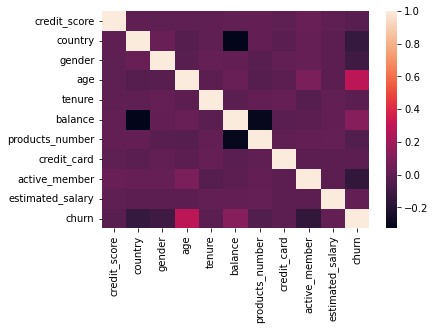

In [20]:
sns.heatmap(df2.corr(), fmt='.2g')

# Preparing Data For Modeling

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

X = df2.drop('churn', axis=1)
y = df2['churn']

# Test size: 20%, Train size: 80%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# Strandardize values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# XGBoost Classifier

In [12]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 85.8 %


In [58]:
y_pred = xgb.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.49      0.58       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



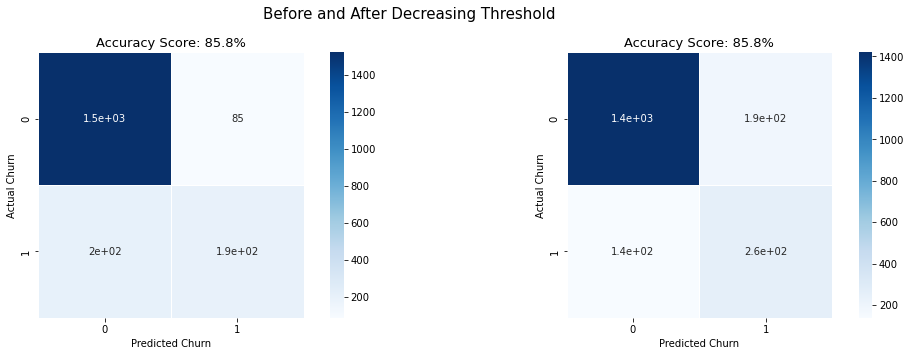

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

y_pred = xgb.predict(X_test)

sns.heatmap(data=confusion_matrix(y_test, y_pred), linewidths=.5, annot=True, square = True, cmap = 'Blues', ax=axs[0])
axs[0].set_ylabel('Actual Churn')
axs[0].set_xlabel('Predicted Churn')
all_sample_title = 'Accuracy Score: {0}%'.format(xgb.score(X_test, y_test)*100)
axs[0].set_title(all_sample_title, size = 13)

y_pred_prob = xgb.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.3).astype(int)

sns.heatmap(data=confusion_matrix(y_test, y_pred), linewidths=.5, annot=True, square = True, cmap = 'Blues', ax=axs[1])
axs[1].set_ylabel('Actual Churn')
axs[1].set_xlabel('Predicted Churn')
all_sample_title = 'Accuracy Score: {0}%'.format(xgb.score(X_test, y_test)*100)
axs[1].set_title(all_sample_title, size = 13)

plt.suptitle("Before and After Decreasing Threshold", size=15)
plt.tight_layout()
plt.show()

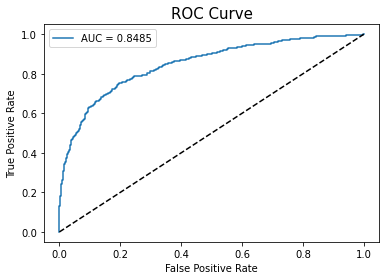

In [39]:
y_pred_prob = xgb.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_prob, columns=['y_pred_prob'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_prob'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_prob'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# LightGBM Classifier

In [36]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
lgb = lgb.fit(X_train,y_train)

y_pred = lgb.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.6 %


In [57]:
y_pred = lgb.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.73      0.51      0.60       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



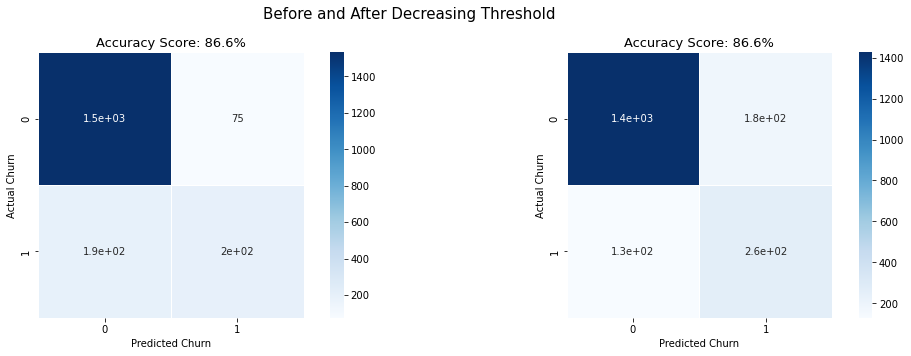

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

y_pred = lgb.predict(X_test)

sns.heatmap(data=confusion_matrix(y_test, y_pred), linewidths=.5, annot=True, square = True, cmap = 'Blues', ax=axs[0])
axs[0].set_ylabel('Actual Churn')
axs[0].set_xlabel('Predicted Churn')
all_sample_title = 'Accuracy Score: {0}%'.format(lgb.score(X_test, y_test)*100)
axs[0].set_title(all_sample_title, size = 13)

y_pred_prob = lgb.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.3).astype(int)

sns.heatmap(data=confusion_matrix(y_test, y_pred), linewidths=.5, annot=True, square = True, cmap = 'Blues', ax=axs[1])
axs[1].set_ylabel('Actual Churn')
axs[1].set_xlabel('Predicted Churn')
all_sample_title = 'Accuracy Score: {0}%'.format(lgb.score(X_test, y_test)*100)
axs[1].set_title(all_sample_title, size = 13)

plt.suptitle("Before and After Decreasing Threshold", size=15)
plt.tight_layout()
plt.show()

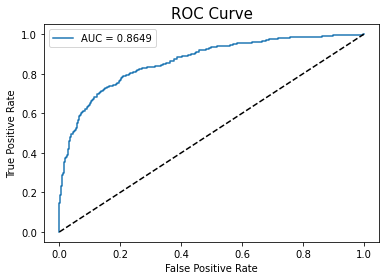

In [42]:
y_pred_prob = lgb.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_prob, columns=['y_pred_prob'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_prob'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_prob'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# CatBoost Classifier

In [25]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(verbose=False)
cat = cat.fit(X_train,y_train)

y_pred = cat.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.75 %


In [49]:
y_pred = cat.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1607
           1       0.59      0.67      0.63       393

    accuracy                           0.85      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.85      0.85      2000



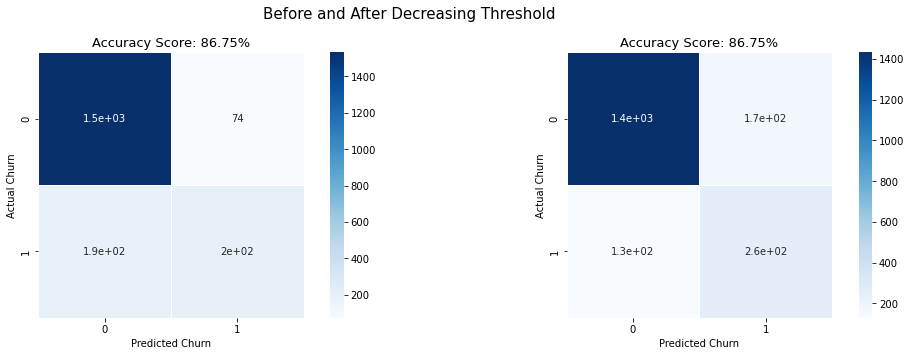

In [56]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

y_pred = cat.predict(X_test)

sns.heatmap(data=confusion_matrix(y_test, y_pred), linewidths=.5, annot=True, square = True, cmap = 'Blues', ax=axs[0])
axs[0].set_ylabel('Actual Churn')
axs[0].set_xlabel('Predicted Churn')
all_sample_title = 'Accuracy Score: {0}%'.format(cat.score(X_test, y_test)*100)
axs[0].set_title(all_sample_title, size = 13)

y_pred_prob = cat.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.3).astype(int)

sns.heatmap(data=confusion_matrix(y_test, y_pred), linewidths=.5, annot=True, square = True, cmap = 'Blues', ax=axs[1])
axs[1].set_ylabel('Actual Churn')
axs[1].set_xlabel('Predicted Churn')
all_sample_title = 'Accuracy Score: {0}%'.format(cat.score(X_test, y_test)*100)
axs[1].set_title(all_sample_title, size = 13)

plt.suptitle("Before and After Decreasing Threshold", size=15)
plt.tight_layout()
plt.show()

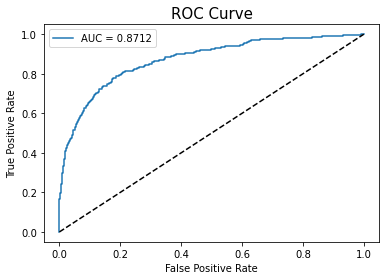

In [51]:
y_pred_prob = cat.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), 
                                 pd.DataFrame(y_pred_prob, columns=['y_pred_prob'])], 
                                axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_prob'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_prob'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Conclusion

The churn variable has imbalanced data. A simple solution to handle imbalanced data are is to reduce the decision threshold which increases the recall of the model.

Out of the 3 models we trained, XGBoost,LightGBM and CatBoost, CatBoost has the highest recall and AUC value, indicating that CatBoost Classifier is the most capable in identifying customers that are likely to churn.

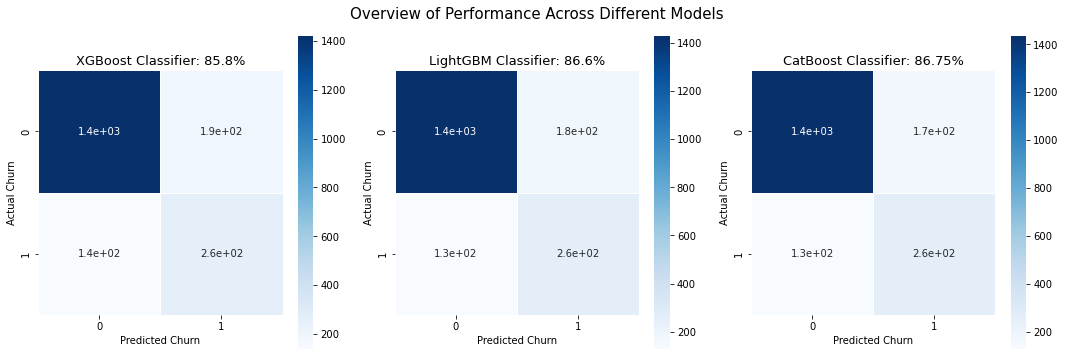

In [63]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot 1
xgb.fit(X_train, y_train)
y_pred = ((xgb.predict_proba(X_test)[:][:,1]) > 0.3).astype(int)

sns.heatmap(data=confusion_matrix(y_test, y_pred), linewidths=.5, annot=True, square = True, cmap = 'Blues', ax=axs[0])
axs[0].set_ylabel('Actual Churn')
axs[0].set_xlabel('Predicted Churn')
all_sample_title = 'XGBoost Classifier: {0}%'.format(xgb.score(X_test, y_test)*100)
axs[0].set_title(all_sample_title, size = 13)


# Plot 2
lgb.fit(X_train, y_train)
y_pred = ((lgb.predict_proba(X_test)[:][:,1]) > 0.3).astype(int)

sns.heatmap(data=confusion_matrix(y_test, y_pred), linewidths=.5, annot=True, square = True, cmap = 'Blues', ax=axs[1])
axs[1].set_ylabel('Actual Churn')
axs[1].set_xlabel('Predicted Churn')
all_sample_title = 'LightGBM Classifier: {0}%'.format(lgb.score(X_test, y_test)*100)
axs[1].set_title(all_sample_title, size = 13)


# Plot 3
cat.fit(X_train, y_train)
y_pred = ((cat.predict_proba(X_test)[:][:,1]) > 0.3).astype(int)

sns.heatmap(data=confusion_matrix(y_test, y_pred), linewidths=.5, annot=True, square = True, cmap = 'Blues', ax=axs[2])
axs[2].set_ylabel('Actual Churn')
axs[2].set_xlabel('Predicted Churn')
all_sample_title = 'CatBoost Classifier: {0}%'.format(cat.score(X_test, y_test)*100)
axs[2].set_title(all_sample_title, size = 13)

plt.suptitle("Overview of Performance Across Different Models", size=15)
plt.tight_layout()
plt.show()